<a href="https://colab.research.google.com/github/LEEGWONSEOK/MLDL_Basic/blob/main/2_2_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
## data
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [57]:
## 모듈 정리
import numpy as np
import matplotlib.pyplot as plt

In [58]:
## np.column_stack 활용
np.column_stack(([1, 2, 3], [4, 5, 6]))   # 두 리스트를 짤라서 넣는게 가능하다

array([[1, 4],
       [2, 5],
       [3, 6]])

In [59]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[0])   # 이쁘게 잘려진것을 확인할 수 있다.

[ 25.4 242. ]


In [60]:
## target 만들기 : bream=1, smelt=0
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [61]:
## train / test 분리
from sklearn.model_selection import train_test_split    # train/test 분리하는 라이브러리 모듈

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      random_state=42, stratify=fish_target)

# train_test_split(data, target, random_states=n, stratify=A)
# random_state : seed값 넣는 파라미터
# stratify : 해당 값과 동일한 비율로 쪼갠다(편향 방지)

In [62]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [63]:
## 정규화
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [64]:
print(kn.predict([[25, 150]]))

# 왜 예측을 못하는가? → 정규화를 하지 않았음

[0.]


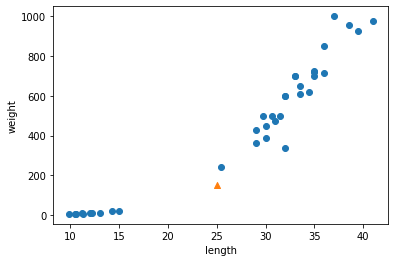

In [65]:
## 그래프로 확인해보기
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 그림만 보면 bream과 가까운것을 확인할 수 있다

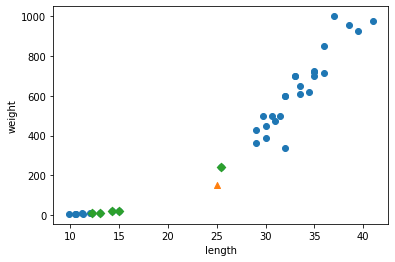

In [66]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# '초록점'은 '세모점'에서 거리가 가장 가까운(근접한) 점들 5개를 표현한것이다.
# 하지만 그래프로만 보았을때 잘못 선택된거 같다 → 하지만 x,y좌표의 단위가 다르기 때문에 오류가 생긴다 

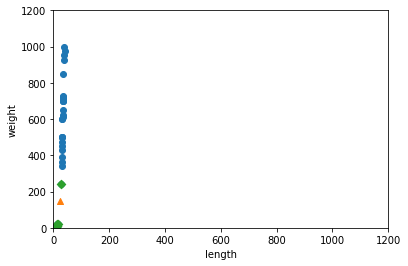

In [67]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1200))
plt.ylim((0, 1200))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# x, y축의 크기를 동일하게 변경하고 그래프를 보면 틀리지 않은 것을 확인할 수 있다.
# 하지만 위 그래프에서 가까운 점을 찾는게 목표인데 어떻게 하면 될까? → 정규화

In [68]:
## 평균, 표준편차
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

# 평균, 표준편차 잘나오는지 확인!
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


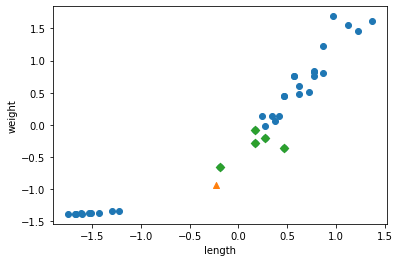

In [72]:
## scale 조정 : (값 - 평균)/표준편차
train_scaled = (train_input - mean) / std   # 훈련세트 scale 조정
test_scaled = (test_input - mean) / std     # 테스트세트 scale 조정
new = ([25, 150] - mean) / std              # 예측할 값 scale 조정

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# 처음돌릴때 왜 이상하게 나오는지? 나중에 확인해보기

In [70]:
## scale 조정된걸로 다시 훈련시키기
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
## 점수 확인
kn.score(test_scaled, test_target)

# 1.0 으로 잘 나오는 것을 확인할 수 있다

1.0

In [74]:
## new 데이터는 어떤 생선인지 확인하기 : bream=1, smelt=0
print(kn.predict([new]))

# 1이 나왔기 때문에 [25, 150] 데이터는 'bream'으로 판단!

[1.]
